In [1]:
%matplotlib inline

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Wedge, Circle
import numpy as np

from geopack import geopack

Load IGRF coefficients ...


In [2]:
def dual_half_circle(center=(0,0), radius=1, angle=90, ax=None, colors=('w','k','k'),
                     **kwargs):
    """
    Add two half circles to the axes *ax* (or the current axes) with the 
    specified facecolors *colors* rotated at *angle* (in degrees).
    """
    if ax is None:
        ax = plt.gca()
    theta1, theta2 = angle, angle + 180
    #w1 = Wedge(center, radius, theta1, theta2, fc=colors[0], **kwargs)
    #w2 = Wedge(center, radius, theta2, theta1, fc=colors[1], **kwargs)
    
    w1 = Wedge(center, radius, theta1, theta2, fc=colors[1], **kwargs)
    w2 = Wedge(center, radius, theta2, theta1, fc=colors[0], **kwargs)
   
    cr = Circle(center, radius, fc=colors[2], fill=False, **kwargs)
    for wedge in [w1, w2, cr]:
        ax.add_artist(wedge)
    return [w1, w2, cr]

def setup_fig(xlim=(10,-30),ylim=(-20,20),xlabel='X GSM [Re]',ylabel='Z GSM [Re]'):

    fig = plt.figure(figsize=(15,10))
    ax  = fig.add_subplot(111)
    ax.axvline(0,ls=':',color='k')
    ax.axhline(0,ls=':',color='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.set_aspect('equal')
    w1,w2,cr = dual_half_circle(ax=ax)
    
    return ax
# ax = setup_fig(xlim=(-10,10),ylim=(-10,10))

# Observatory Locations

In [3]:
obs_lat, obs_lon, name = -85.67, 313.62, 'AGO 2'
ut = 0 # Hours 0-24
ps = geopack.recalc(ut)

In [66]:
lat_rad = np.deg2rad(obs_lat)
lon_rad = np.deg2rad(obs_lon)

# Convert Geodetic to Geocentric Spherical
r, theta_rad = geopack.geodgeo(0,lat_rad,1)

# Convert Geocentric Spherical to Geocentric Cartesian
x_gc,y_gc,z_gc = geopack.sphcar(1,theta_rad,lon_rad,1)
print('GC:  ', x_gc,y_gc,z_gc,' R=',np.sqrt(x_gc**2+y_gc**2+z_gc**2))

# Convert Geocentric Cartesian to GSM
x_gsm,y_gsm,z_gsm = geopack.geogsm(x_gc,y_gc,z_gc,1)
print('GSM: ', x_gsm,y_gsm,z_gsm,' R=',np.sqrt(x_gsm**2+y_gsm**2+z_gsm**2))

GC:   0.05243494986401025 -0.05502364924549361 -0.9971073031807899  R= 1.0
GSM:  0.3429509938404858 0.2501689605554522 -0.9054281346404184  R= 1.0


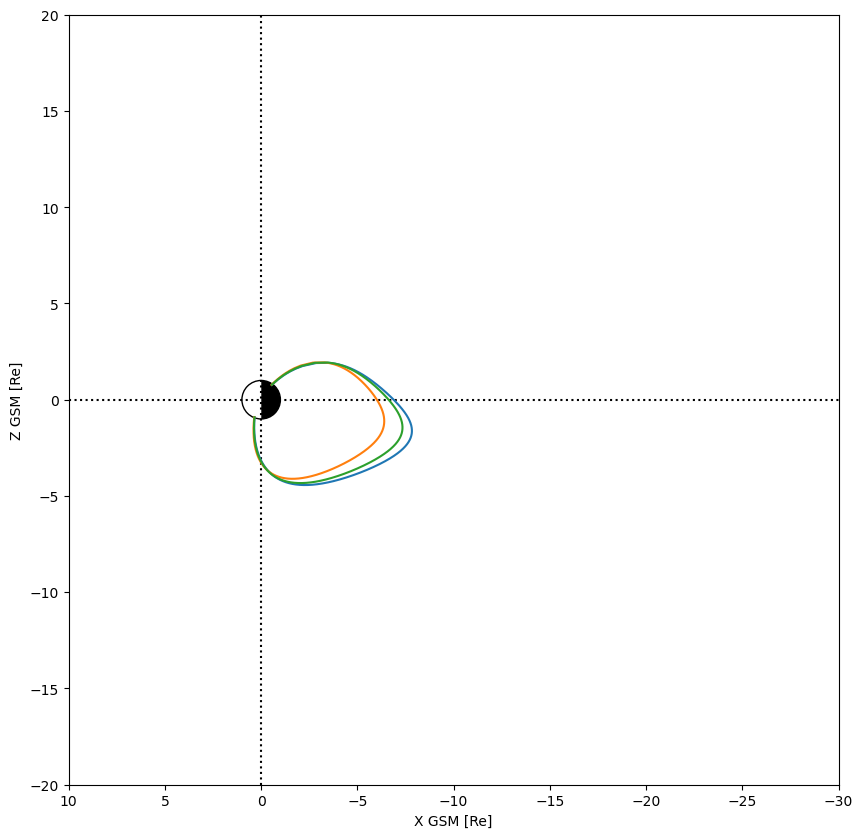

In [71]:
x,y,z,xx,yy,zz = geopack.trace(x_gsm,y_gsm,z_gsm,dir=-1,rlim=1000,r0=.99999,parmod=2,exname='t89',inname='igrf',maxloop=100000)
x1,y1,z1,xx1,yy1,zz1 = geopack.trace(0.36,0.27,-0.90,dir=-1,rlim=1000,r0=.99999,parmod=2,exname='t89',inname='igrf',maxloop=100000)
x2,y2,z2,xx2,yy2,zz2 = geopack.trace(0.35,0.26,-0.91, dir=-1,rlim=1000,r0=.99999,parmod=2,exname='t89',inname='igrf',maxloop=100000)
x3,y3,z3,xx3,yy3,zz3 = geopack.trace(0.34,0.24,-0.89, dir=-1,rlim=1000,r0=.99999,parmod=2,exname='t89',inname='igrf',maxloop=100000)
x4,y4,z4,xx4,yy4,zz4 = geopack.trace(0.34,0.23,-0.91,dir=-1,rlim=1000,r0=.99999,parmod=2,exname='t89',inname='igrf',maxloop=100000)

ax=setup_fig()
ax.plot(xx,zz)
ax.plot(xx1,zz1)
ax.plot(xx2,zz2)
ax.plot(xx3,zz3)
ax.plot(xx4,zz4)
plt.show()

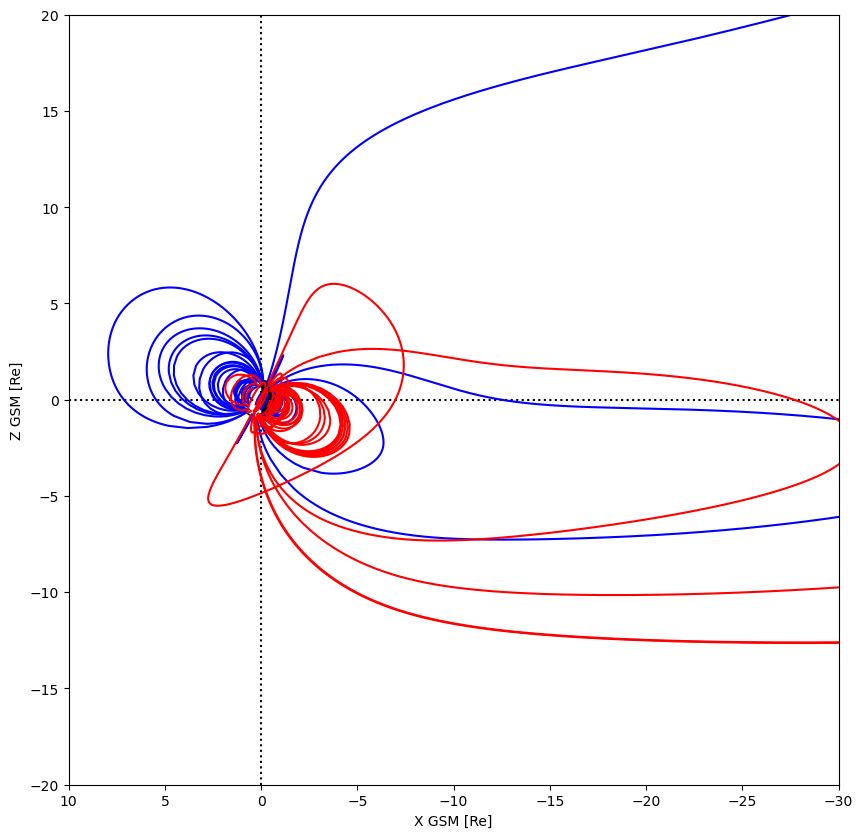

In [85]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Wedge, Circle
import numpy as np

from geopack import geopack

def dual_half_circle(center=(0,0), radius=1, angle=90, ax=None, colors=('w','k','k'),
                     **kwargs):
    """
    Add two half circles to the axes *ax* (or the current axes) with the 
    specified facecolors *colors* rotated at *angle* (in degrees).
    """
    if ax is None:
        ax = plt.gca()
    theta1, theta2 = angle, angle + 180
    #w1 = Wedge(center, radius, theta1, theta2, fc=colors[0], **kwargs)
    #w2 = Wedge(center, radius, theta2, theta1, fc=colors[1], **kwargs)
    
    w1 = Wedge(center, radius, theta1, theta2, fc=colors[1], **kwargs)
    w2 = Wedge(center, radius, theta2, theta1, fc=colors[0], **kwargs)
   
    cr = Circle(center, radius, fc=colors[2], fill=False, **kwargs)
    for wedge in [w1, w2, cr]:
        ax.add_artist(wedge)
    return [w1, w2, cr]

def setup_fig(xlim=(10,-30),ylim=(-20,20),xlabel='X GSM [Re]',ylabel='Z GSM [Re]'):

    fig = plt.figure(figsize=(15,10))
    ax  = fig.add_subplot(111)
    ax.axvline(0,ls=':',color='k')
    ax.axhline(0,ls=':',color='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.set_aspect('equal')
    w1,w2,cr = dual_half_circle(ax=ax)
    
    return ax


def generate_random_points_on_hemisphere(hemisphere='north', num_points=1):
    """
    Generate random points on the northern or southern hemisphere of a unit sphere.
    
    Parameters:
    - hemisphere: 'north' or 'south'
    - num_points: number of random points to generate
    
    Returns:
    - x, y, z coordinates of the random points
    """
    x_coords = []
    y_coords = []
    z_coords = []
    
    for _ in range(num_points):
        phi = 2 * np.pi * np.random.rand()  # azimuthal angle
        if hemisphere == 'north':
            theta = np.pi / 2 * np.random.rand()  # polar angle
        else:
            theta = np.pi / 2 + np.pi / 2 * np.random.rand()  # polar angle
        
        # Convert spherical coordinates to Cartesian coordinates
        x = np.sin(theta) * np.cos(phi)
        y = np.sin(theta) * np.sin(phi)
        z = np.cos(theta)
        
        x_coords.append(x)
        y_coords.append(y)
        z_coords.append(z)
    
    return x_coords, y_coords, z_coords

def trace_and_plot(num_points=5):
    # Generate random points on both hemispheres
    x_north, y_north, z_north = generate_random_points_on_hemisphere('north', num_points)
    x_south, y_south, z_south = generate_random_points_on_hemisphere('south', num_points)
    
    ax = setup_fig()
    
    # Trace and plot field lines for northern hemisphere points
    for x_gsm, y_gsm, z_gsm in zip(x_north, y_north, z_north):
        x, y, z, xx, yy, zz = geopack.trace(x_gsm, y_gsm, z_gsm, dir=1, rlim=1000, r0=.99999, parmod=2, exname='t89', inname='igrf', maxloop=10000)
        ax.plot(xx, zz, color='blue')  # Using blue for northern hemisphere
    
    # Trace and plot field lines for southern hemisphere points
    for x_gsm, y_gsm, z_gsm in zip(x_south, y_south, z_south):
        x, y, z, xx, yy, zz = geopack.trace(x_gsm, y_gsm, z_gsm, dir=-1, rlim=1000, r0=.99999, parmod=2, exname='t89', inname='igrf', maxloop=10000)
        ax.plot(xx, zz, color='red')  # Using red for southern hemisphere
    
    plt.show()

# Call the function to trace and plot for a given number of points
trace_and_plot(num_points=50)


In [ ]:
from geopack import t96
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def calc_ut(string):
    t1 = parser.parse(string)
    t0 = datetime(1970,1,1)
    ut = int((t1-t0).total_seconds())
    return ut 


dframe = dframe1[dframe1["x,GSE"] < 1000]

def calculate_ThetaShear(df, start_time=None, probint=int, ):
    
    if start_time:
        df = df[start_time:]
    start_datetime = parser.parse(start_time)
    
    Timesteps = 1
    
    ScalingTerm = np.arange(0, len(df)) < Timesteps # to take n number of time steps
    Pdyn = df['Flow Pressure'][ScalingTerm]
    By_gsm = df['By,GSM'][ScalingTerm]
    Bz_gsm = df['Bz,GSM'][ScalingTerm]
    
    Dst = -6
    Ind = np.arange(0, Timesteps)
    Be = np.zeros((3, Timesteps))
    Bi = np.zeros((3, len(Pdyn)))
   
 
    Ind = np.arange(0, Timesteps)
    IMFCA = np.zeros(Timesteps)


    YZ_Resolution = 80
    Extension = 20 # n x n grid
    Ex = Extension/2
    Dy = np.linspace(-Ex, Ex, YZ_Resolution) # values to add to the y positional argument to create a grid of theta shears
    Dz = np.linspace(-Ex, Ex, YZ_Resolution) # values to add to the z positional argument to create a grid of theta shears


    theta_shearArr = np.zeros((len(Pdyn), len(Dy), len(Dz))) # time, y position, z position
    theta_shearArr2 = np.zeros((len(Pdyn), len(Dy), len(Dz)))

    for ind, pdyn, by, bz in zip(Ind, Pdyn, By_gsm, Bz_gsm):
        
        par = np.array([pdyn, Dst, by, bz, 0, 0, 0, 0, 0, 0])
        y = z = 0
        x = 5

        current_time = start_datetime + timedelta(minutes=int(probint * ind))
        current_datetimes.append(current_time)
#print(current_time)
        ut = calc_ut(str(current_time))
        ps = geopack.recalc(ut)
#print(ut, ps)

        
        
        IMFCA[ind] = np.arctan2(by, bz)

        # Be[0, ind], Be[1, ind], Be[2, ind] = geopack.t96.t96(par, ps, x, y, z)
        # Bi[0, ind], Bi[1, ind], Bi[2, ind] = geopack.dip(x, y, z)

#         Be[:, ind] = geopack.t96.t96(par, ps, x, y, z)
#         Bi[:, ind] = geopack.dip(x, y, z)

        # theta_shearArr[ind] = np.arccos(np.dot(Bi[:, ind], Be[:, ind]) / (np.linalg.norm(Bi[:, ind]) * np.linalg.norm(Be[:, ind])))

        for iz, dz in enumerate(Dz):
            for iy, dy in enumerate(Dy):
                
#                 print(iz, dz)
#                 print(iy, dy)

                
               

                dBe = geopack.t96.t96(par, ps, x, y+dy, z+dz)
                dBi = geopack.dip(x, y+dy, z+dz)
#                 print("dBe", dBe)
#                 print("dBi", dBi)
                
                #dbxe, dbye, dbze = geopack.t96.t96(par, ps, x, y+dy, z+dz)
                #dbxi, dbyi, dbzi = geopack.dip(x, y+dy, z+dz)
                
                #dBe2 = (dbye, dbze)
                #dBi2 = (dbyi, dbzi)


                cosarg = round(np.dot(dBe, dBi)/ (np.linalg.norm(dBi) * np.linalg.norm(dBe)), 8)
                #cosarg2 = round(np.dot(dBe2, dBi2)/ (np.linalg.norm(dBi2) * np.linalg.norm(dBe2)), 8)

                theta_shearArr[ind, iy, iz] = np.arccos(cosarg)
                #theta_shearArr2[ind, iy, iz] = np.arccos(cosarg2)
                theta_shearArr[ind, iy, iz] = np.degrees(theta_shearArr[ind, iy, iz])
                #theta_shearArr2[ind, iy, iz] = np.degrees(theta_shearArr2[ind, iy, iz])
        
                
                if (np.isnan(theta_shearArr[ind, iy, iz])):
                    if np.dot(dBe, dBi) / (np.linalg.norm(dBi) * np.linalg.norm(dBe)) < -1.0:
                        theta_shearArr[ind, iy, iz] = np.pi
                    if np.dot(dBe, dBi)/ (np.linalg.norm(dBi) * np.linalg.norm(dBe)) > 1:
                        theta_shearArr[ind, iy, iz] = 0
                    else:
                        print(np.dot(dBe, dBi)/ (np.linalg.norm(dBi) * np.linalg.norm(dBe)))
                #print(IMFCA[ind])
#                 print("ThetaShear 1", theta_shearArr[ind, iy, iz])
#                 print("ThetaShear 2", theta_shearArr2[ind, iy, iz])

                

    return IMFCA, Be, Bi, theta_shearArr



start_time = '2001-03-19 12:20:00'


IMFCA, Be, Bi, theta_shear1 = calculate_ThetaShear(dframe, start_time, 5)


#Make dir for plots movies

# Convert datetime for title
    
start_datetime = datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')

for i in range(len(theta_shear1[:, 0, 0])):
    data = theta_shear1[i, :, :]
    plt.imshow(data.T, cmap='jet', vmin=0, vmax=180)
    plt.colorbar(label=r'$\theta_{shear}$')
    
    # clock angle legend
    legend_text = r"$\theta_{IMF}$" + f" = {np.degrees(IMFCA[i]):.2f}"
    plt.text(0.1, 0.1, legend_text, transform=plt.gca().transAxes, color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.5))
    
    # Calculate the title with updated datetime
    current_datetime = start_datetime + timedelta(minutes=5*i)
    title_text = f"Magnetopause at: {current_datetime.strftime('%Y-%m-%d %H:%M:%S')}"
    plt.title(title_text)
    
    #Save the plot:
    
    #plt.savefig(f'movietime/plot_{i}.png', dpi=300)

    plt.show()
    
#print(np.degrees(IMFCA))

In [ ]:
def get_dataframe_by_url_index():
    session = FTP_TLS('spdf.gsfc.nasa.gov')
    session.login()
    session.cwd('pub/data/omni/high_res_omni/')
    dir = 'https://spdf.gsfc.nasa.gov/pub/data/omni/high_res_omni/'
    urls = [dir + f[0] for f in session.mlsd() if f[0][-3:] == 'asc']
    session.quit()
    for i in range(len(urls)):
        print("number: ", i, " data: ", urls[i])
    index_number = int(input("select the number of your data (which corresponds to the year): "))


    if index_number >= len(urls):
        print("Index out of range.")
        return None

    dframe = pd.read_csv(urls[index_number], delim_whitespace=True, 
                         parse_dates={'datetime':[0,1,2,3]}, date_format='%Y %j %H %M',
                         usecols=[0, 1, 2, 3, 14, 17, 18, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33],
                         names=['Year','Day','Hour','Minute', 'Bx,GSM', 'By,GSM', 'Bz,GSM', 'Flow Speed',
                                'Vx,GSE', 'Vy,GSE', 'Vz,GSE', 'Proton Density', 'Flow Pressure',
                                'Electric Field', 'Plasma Beta', 'Alfven Mach Number',
                                'x,GSE', 'y,GSE', 'z,GSE']).set_index('datetime').sort_index()
    return dframe


In [ ]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Wedge, Circle
import numpy as np

from geopack import geopack

def dual_half_circle(center=(0,0), radius=1, angle=90, ax=None, colors=('w','k','k'),
                     **kwargs):
    """
    Add two half circles to the axes *ax* (or the current axes) with the 
    specified facecolors *colors* rotated at *angle* (in degrees).
    """
    if ax is None:
        ax = plt.gca()
    theta1, theta2 = angle, angle + 180
    #w1 = Wedge(center, radius, theta1, theta2, fc=colors[0], **kwargs)
    #w2 = Wedge(center, radius, theta2, theta1, fc=colors[1], **kwargs)
    
    w1 = Wedge(center, radius, theta1, theta2, fc=colors[1], **kwargs)
    w2 = Wedge(center, radius, theta2, theta1, fc=colors[0], **kwargs)
   
    cr = Circle(center, radius, fc=colors[2], fill=False, **kwargs)
    for wedge in [w1, w2, cr]:
        ax.add_artist(wedge)
    return [w1, w2, cr]

def setup_fig(xlim=(10,-30),ylim=(-20,20),xlabel='X GSM [Re]',ylabel='Z GSM [Re]'):

    fig = plt.figure(figsize=(15,10))
    ax  = fig.add_subplot(111)
    ax.axvline(0,ls=':',color='k')
    ax.axhline(0,ls=':',color='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.set_aspect('equal')
    w1,w2,cr = dual_half_circle(ax=ax)
    
    return ax


def generate_random_points_on_hemisphere(hemisphere='north', num_points=1):
    """
    Generate random points on the northern or southern hemisphere of a unit sphere.
    
    Parameters:
    - hemisphere: 'north' or 'south'
    - num_points: number of random points to generate
    
    Returns:
    - x, y, z coordinates of the random points
    """
    x_coords = []
    y_coords = []
    z_coords = []
    
    for _ in range(num_points):
        phi = 2 * np.pi * np.random.rand()  # azimuthal angle
        if hemisphere == 'north':
            theta = np.pi / 2 * np.random.rand()  # polar angle
        else:
            theta = np.pi / 2 + np.pi / 2 * np.random.rand()  # polar angle
        
        # Convert spherical coordinates to Cartesian coordinates
        x = np.sin(theta) * np.cos(phi)
        y = np.sin(theta) * np.sin(phi)
        z = np.cos(theta)
        
        x_coords.append(x)
        y_coords.append(y)
        z_coords.append(z)
    
    return x_coords, y_coords, z_coords

def trace_and_plot(num_points=5):
    # Generate random points on both hemispheres
    x_north, y_north, z_north = generate_random_points_on_hemisphere('north', num_points)
    x_south, y_south, z_south = generate_random_points_on_hemisphere('south', num_points)
    
    # Trace and plot field lines for northern hemisphere points
    for x_gsm, y_gsm, z_gsm in zip(x_north, y_north, z_north):
        x, y, z, xx, yy, zz = geopack.trace(x_gsm, y_gsm, z_gsm, dir=1, rlim=1000, r0=.99999, parmod=2, exname='t89', inname='igrf', maxloop=10000)
        
    # Trace and plot field lines for southern hemisphere points
    for x_gsm, y_gsm, z_gsm in zip(x_south, y_south, z_south):
        x, y, z, xx, yy, zz = geopack.trace(x_gsm, y_gsm, z_gsm, dir=-1, rlim=1000, r0=.99999, parmod=2, exname='t89', inname='igrf', maxloop=10000)
        
    

# Call the function to trace and plot for a given number of points
trace_and_plot(num_points=5)
